In [2]:
import particles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

# example image

In [3]:
%matplotlib inline

In [58]:
files = ["./data/test_1000_nm.txt","./data/test_1500_nm.txt","./data/test_2000_nm.txt"]

In [4]:
p = particles.Particles('./data/test_1500_nm.txt', dimension=2, time_start=0, time_end=20000, time_step=100)

### Display Some of the data. Columns represent different times (not at scale). rows represent particle id. the cells are x coordinates.

In [5]:
p.qx.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,19.0,19.014981,19.085776,19.633864,21.383777,22.433596,24.975931,28.105122,31.469543,35.048839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.0,18.993310,19.012914,19.065987,19.823326,21.465649,21.489860,21.538728,22.177148,22.727394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,18.972323,19.039182,19.508125,21.912596,24.877027,27.442282,30.536056,34.045674,37.566098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.0,19.013480,19.052376,19.668409,21.590631,24.675981,27.919488,31.517857,34.807724,38.148181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.0,18.959115,19.085045,19.652852,21.496137,22.232983,24.090050,25.590941,28.697014,31.234870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# snapshot at time

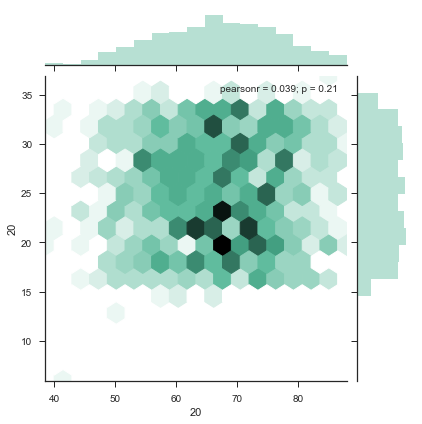

In [6]:
# rs = np.random.RandomState(11)
x = p.qx[20]
y = p.qy[20]

sns.jointplot(x, y, kind="hex", color="#4CB391")

In [7]:
n=1
m1x = np.zeros(p.time.shape[0])
m1y = np.zeros(p.time.shape[0])

for i in range(p.qx.shape[1]):
    m1x[i] = np.sum(p.qx[i]**n)/np.sum(p.qx[i]**0)
    m1y[i] = np.sum(p.qy[i]**n)/np.sum(p.qy[i]**0)

time = p.time



import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(time[:10],m1x[:10])
v = 0.000001 #m/s
slope/1000 #mm/min
v_ratio = (slope/1000)/(v*60)
print(r_value)

0.998987753655


In [8]:
slope

0.022626337967540693

In [9]:
v_ratio

0.37710563279234488

In [10]:
time[3]

300

In [11]:
m1x_1000 = pd.read_csv("./m1x.txt")

In [17]:
m1x_1000.head()

,Unnamed: 0,0
0,0,361.000000
1,1,430.350880
2,2,514.907716
3,3,612.597290
4,4,729.310891


In [19]:
m1x

array([  19.        ,   20.72603096,   22.7213247 ,   24.86525066,
         27.1292708 ,   29.46814837,   31.80302865,   34.22319051,
         36.67056238,   39.11792399,   41.6307049 ,   44.11940461,
         46.63504513,   49.1628369 ,   51.67686064,   54.16647002,
         56.65982538,   59.13701389,   61.61498423,   64.12307024,
         66.65090238,   69.20629794,   71.72182518,   74.22399179,
         76.73918747,   79.29756359,   81.83796738,   84.4095535 ,
         86.93723027,   89.51427888,   92.09737618,   94.65072451,
         97.19085783,   99.73662725,  102.16980976,  103.7713095 ,
        104.69974537,  104.27850747,  103.38234933,  101.1761465 ,
         98.11030608,   93.38934082,   87.93238835,   81.82981264,
         73.84706908,   66.18347055,   58.42482364,   51.41909127,
         46.33337409,   40.26739589,   34.61264685,   29.93572292,
         26.13657421,   22.27198559,   20.13795175,   16.86149395,
         14.0560224 ,   10.89063779,    8.18070232,    6.23932

In [12]:
a = m1x_1000['0'].values

In [13]:
b = m1x

In [14]:
m1

NameError: name 'm1' is not defined

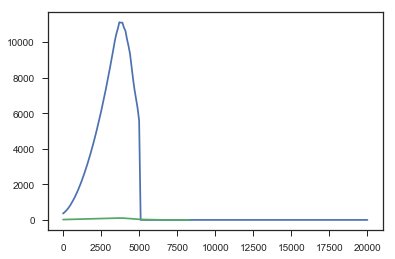

In [15]:
plt.plot(time,a)
plt.plot(time,b)

### velocity ratio

##### the center of mass moves faster than the average velocity

### check with average over velocity fireld

In [26]:
v_ratio

0.35948936064232795

# first MOMENT

# m1x

In [35]:
pd.DataFrame(m1x).to_csv("m1x.txt")

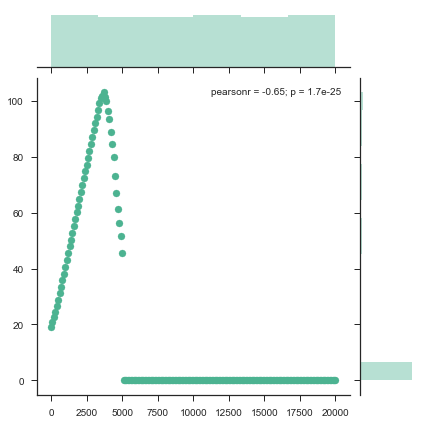

In [27]:
sns.jointplot(p.time, m1x, color="#4CB391")

# m1y

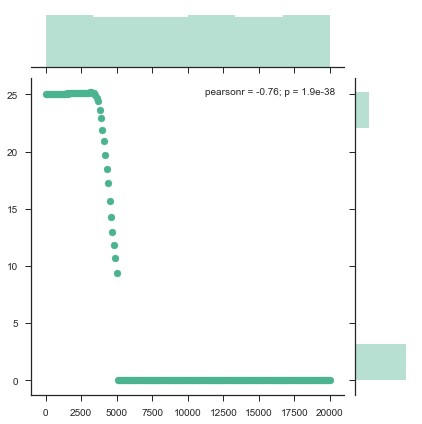

In [28]:
sns.jointplot(p.time, m1y, color="#4CB391")

# 2nd order moments

In [29]:
n=2
m1x = np.zeros(p.time.shape[0])
m1y = np.zeros(p.time.shape[0])

for i in range(p.qx.shape[1]):
    m1x[i] = np.sum(p.qx[i]**n)/np.sum(p.qx[i]**0)
    m1y[i] = np.sum(p.qy[i]**n)/np.sum(p.qy[i]**0)

## m2x


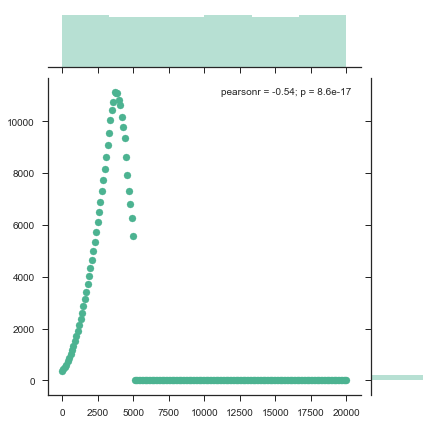

In [30]:
sns.jointplot(p.time, m1x, color="#4CB391")

### m2y


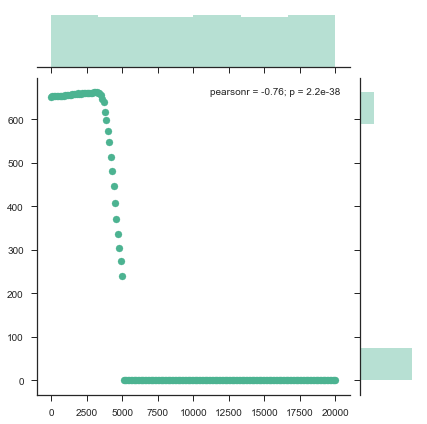

In [31]:
sns.jointplot(p.time, m1y, color="#4CB391")